CELEBRITY IMAGE CLASSIFICATION USING CNN


Submitted by,

NIDIN V NANDAN

MSc Computer Science With Data Analytics

Reg No: 223039

In [2]:
#importing neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

In [3]:
# Defining the directory paths and loading the images
image_dir='cropped/'
lionel_messi_images=os.listdir(image_dir+ '/lionel_messi')
maria_sharapova_images=os.listdir(image_dir+ '/maria_sharapova')
roger_federer_images=os.listdir(image_dir+ '/roger_federer')
serena_williams_images=os.listdir(image_dir+ '/serena_williams')
virat_kohli_images=os.listdir(image_dir+ '/virat_kohli')

In [4]:
dataset = []
label = []
img_siz= (128, 128)

In [5]:
# Loop through each celebrity folder
for i , image_name in tqdm(enumerate(lionel_messi_images),desc="lionel_messi"):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'/lionel_messi/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize(img_siz)
        dataset.append(np.array(image))
        label.append(0)

for i , image_name in tqdm(enumerate(maria_sharapova_images),desc="maria_sharapova"):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'/maria_sharapova/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize(img_siz)
        dataset.append(np.array(image))
        label.append(1)
for i , image_name in tqdm(enumerate(roger_federer_images),desc="roger_federer"):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'/roger_federer/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize(img_siz)
        dataset.append(np.array(image))
        label.append(2)
for i , image_name in tqdm(enumerate(serena_williams_images),desc="serena_williams"):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'/serena_williams/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize(img_siz)
        dataset.append(np.array(image))
        label.append(3)
for i , image_name in tqdm(enumerate(virat_kohli_images),desc="virat_kohli"):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'/virat_kohli/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize(img_siz)
        dataset.append(np.array(image))
        label.append(4)

lionel_messi: 36it [00:01, 35.75it/s]
maria_sharapova: 34it [00:00, 48.68it/s]
roger_federer: 28it [00:00, 64.75it/s]
serena_williams: 29it [00:00, 65.10it/s]
virat_kohli: 41it [00:00, 91.57it/s]


In [6]:
# Convert lists to numpy arrays
dataset = np.array(dataset)
label = np.array(label)

In [7]:
# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=42)

# Normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [8]:
# CNN Model creation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 256)               32514304  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                        

In [11]:
# Model training
history = model.fit(x_train, y_train, epochs=40, batch_size=128, validation_split=0.1)

Epoch 1/40
1/1 [==============================] - 13s 13s/step - loss: 1.6077 - accuracy: 0.2167 - val_loss: 4.8693 - val_accuracy: 0.1429
Epoch 2/40
1/1 [==============================] - 3s 3s/step - loss: 3.3163 - accuracy: 0.3083 - val_loss: 2.6285 - val_accuracy: 0.0000e+00
Epoch 3/40
1/1 [==============================] - 2s 2s/step - loss: 2.5628 - accuracy: 0.2250 - val_loss: 1.6884 - val_accuracy: 0.4286
Epoch 4/40
1/1 [==============================] - 2s 2s/step - loss: 2.8945 - accuracy: 0.1750 - val_loss: 1.4972 - val_accuracy: 0.4286
Epoch 5/40
1/1 [==============================] - 2s 2s/step - loss: 2.3691 - accuracy: 0.2167 - val_loss: 1.4817 - val_accuracy: 0.1429
Epoch 6/40
1/1 [==============================] - 2s 2s/step - loss: 1.9148 - accuracy: 0.2000 - val_loss: 1.7853 - val_accuracy: 0.1429
Epoch 7/40
1/1 [==============================] - 3s 3s/step - loss: 1.6182 - accuracy: 0.2500 - val_loss: 2.0640 - val_accuracy: 0.1429
Epoch 8/40
1/1 [===================

In [12]:
# Model evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {round(accuracy * 100, 2)}')

# Predictions
y_pred = model.predict(x_test)
predicted_labels = np.argmax(y_pred, axis=1)

# Classification report
print('Classification Report\n', classification_report(y_test, predicted_labels))

2/2 [==============================] - 1s 99ms/step - loss: 0.6443 - accuracy: 0.7647
Accuracy: 76.47
2/2 [==============================] - 1s 29ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.86      0.80         7
           2       0.75      0.75      0.75         4
           3       0.75      0.50      0.60         6
           4       0.70      1.00      0.82         7

    accuracy                           0.76        34
   macro avg       0.77      0.76      0.75        34
weighted avg       0.78      0.76      0.76        34



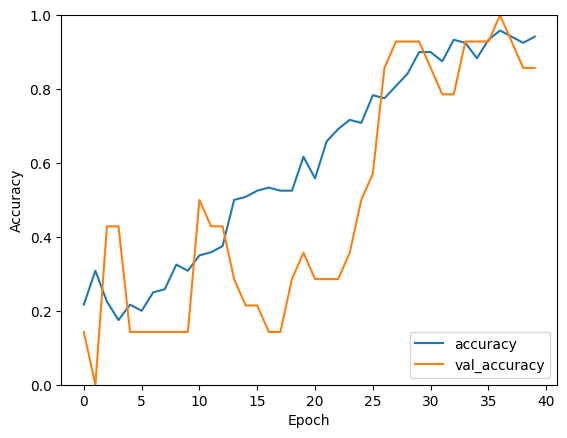

In [13]:
# Plot accuracy
plt.plot(history.epoch, history.history['accuracy'], label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.savefig('celebrity_image_sample_accuracy_plot.png')

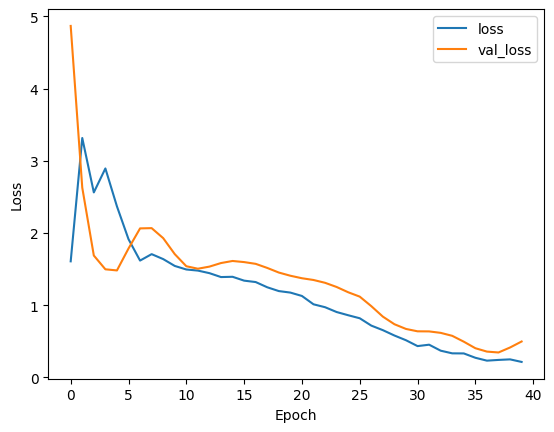

In [14]:
plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('image_sample_loss_plot.png')


In [15]:
#defining function for predicting
def predict_celebrity(image_path, model):
    celebrities = ['lionel_messi', 'maria_sharapova', 'roger_federer', 'serena_williams', 'virat_kohli']

    img_size = (128, 128)
    image = cv2.imread(image_path)
    image = Image.fromarray(image, 'RGB')
    image = image.resize(img_size)
    image = np.array(image)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = tf.keras.utils.normalize(image, axis=1)
    
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)
    celebrity = celebrities[predicted_label]
    
    return celebrity

In [19]:
new_image_path = [r'C:\Users\Admin\Desktop\celebrity\cropped\virat_kohli\virat_kohli7.png',
                  r'C:\Users\Admin\Desktop\celebrity\cropped\lionel_messi\lionel_messi2.png',
                  r'C:\Users\Admin\Desktop\celebrity\cropped\roger_federer\roger_federer2.png',
                  r'C:\Users\Admin\Desktop\celebrity\cropped\serena_williams\serena_williams4.png',
                  r'C:\Users\Admin\Desktop\celebrity\cropped\maria_sharapova\maria_sharapova5.png']
for i in new_image_path:
    predicted_celebrity = predict_celebrity(i, model)
    print(f'The predicted celebrity is: {predicted_celebrity}')

1/1 [==============================] - 0s 177ms/step
The predicted celebrity is: virat_kohli
1/1 [==============================] - 0s 59ms/step
The predicted celebrity is: lionel_messi
1/1 [==============================] - 0s 57ms/step
The predicted celebrity is: roger_federer
1/1 [==============================] - 0s 58ms/step
The predicted celebrity is: serena_williams
1/1 [==============================] - 0s 68ms/step
The predicted celebrity is: maria_sharapova


SUMMARY

Here first the images of the different celebrities are loaded from the respective folders and was preprocessed and loaded into the dataset list and for each celebrity a corresponding label is attached to the label list

CHOSEN MODEL- Convolutional Neural Network(CNN)


Model Archietecture:

"
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),

    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(5, activation='softmax') 

])


model.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy', 

              metrics=['accuracy'])"




Here

Input Layer: Accepts images of size 128x128 pixels with three color channels (RGB).

Convolutional Layers:

32 filters of size 3x3, using ReLU activation function.

Followed by max-pooling with a 2x2 window to reduce spatial dimensions.


Flattening Layer: 

Flattens the output from the convolutional layers into a 1D array to feed into the densely connected layers.


Densely Connected Layers:

First dense layer with 256 neurons and ReLU activation.

Dropout layer with a rate of 0.5 to reduce overfitting.

Second dense layer with 512 neurons and ReLU activation.

Final dense layer with 5 neurons, using the softmax activation function for multi-class classification (outputting probabilities for 5 classes).


Optimizer: Adam optimizer is used

Loss function: Sparse categorical cross-entropy, which is suitable for multi-class classification.

Metrics: Accuracy, to evaluate the model's performance during training.

TRAINING


history = model.fit(x_train, y_train, epochs=40, batch_size=128, validation_split=0.1)

Here the model is trained for 40 epochs with batch size of 128



EVALUATION

Here we evaluated the model on the test data and a classification report was generated

the accuracy was recorded as 76%

PREDICTION

A function "predict_celebrity" was created inorder to take the user input image a preprocessed for predicting the celebrity

And we can observe that the model is predicting correctly the celebrities among the inputed image
